## Titanic dataset Visualisation with Seaborn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
url = 'https://drive.google.com/uc?id=1zyYJMa75UXLjmODPRnl4_UrLJ0JKmEOC'
df = pd.read_csv(url)

### Missing Data

<Axes: >

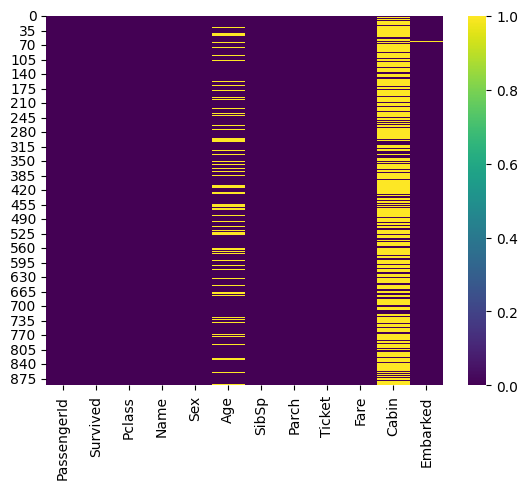

In [3]:
sns.heatmap(df.isnull(), cmap='viridis')

### Survived count

<Axes: xlabel='Survived', ylabel='count'>

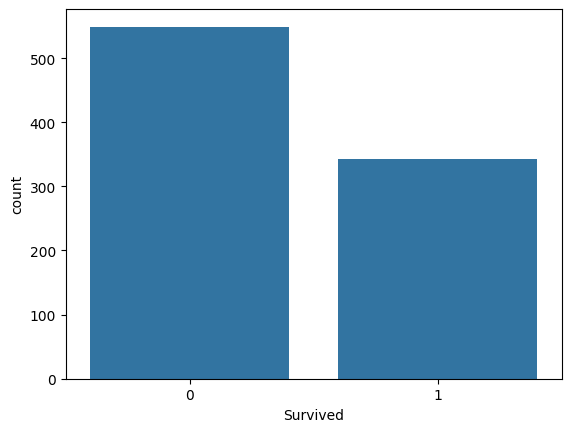

In [4]:
# sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df)

### Survived by sex

<Axes: xlabel='Survived', ylabel='count'>

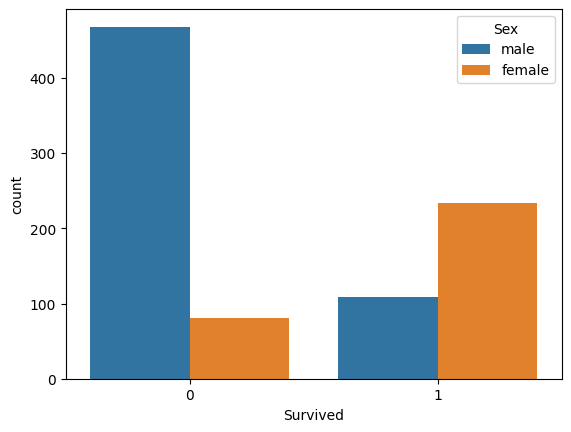

In [5]:
sns.countplot(x='Survived',hue='Sex',data=df)

### Survived by Cab Class

<Axes: xlabel='Survived', ylabel='count'>

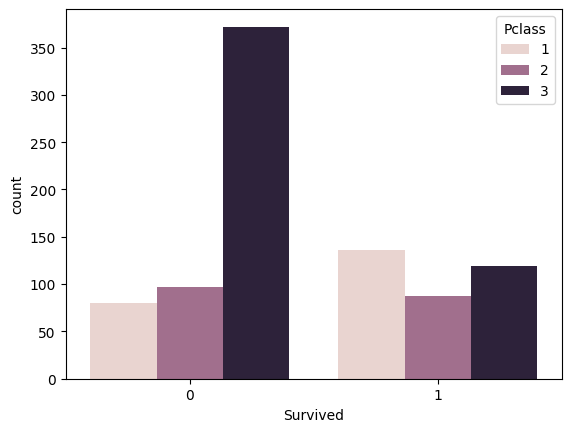

In [6]:
sns.countplot(x='Survived',hue='Pclass',data=df)

### Distribution of age

<Axes: xlabel='Age', ylabel='Count'>

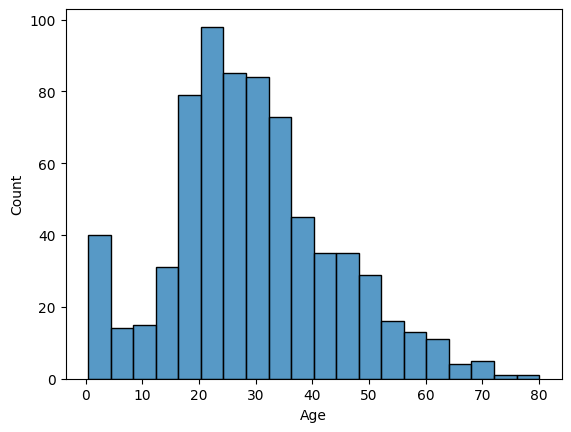

In [7]:
sns.histplot(df['Age'])

In [8]:
### Class / Age distribution

<Axes: xlabel='Pclass', ylabel='Age'>

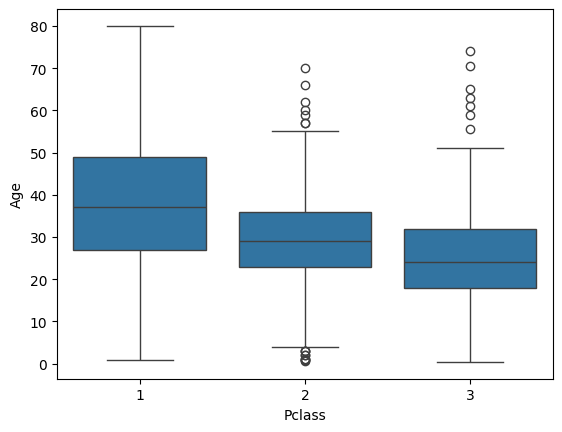

In [9]:
sns.boxplot(
    x='Pclass',
    y='Age',
    data=df
)

## Додаткові візуалізації

In [10]:
import seaborn as sns, matplotlib.pyplot as plt, numpy as np, pandas as pd
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (7, 4)

df = sns.load_dataset("titanic")


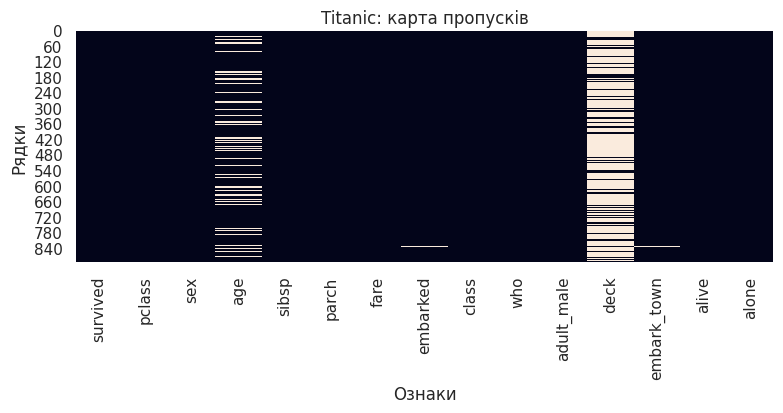

In [11]:
# 1) Карта пропусків (якість даних)
plt.figure(figsize=(9, 3))
sns.heatmap(df.isna(), cbar=False)
plt.title("Titanic: карта пропусків"); plt.xlabel("Ознаки"); plt.ylabel("Рядки")
plt.show()



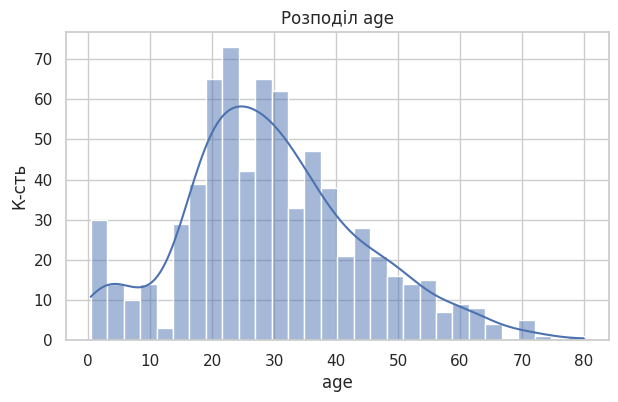

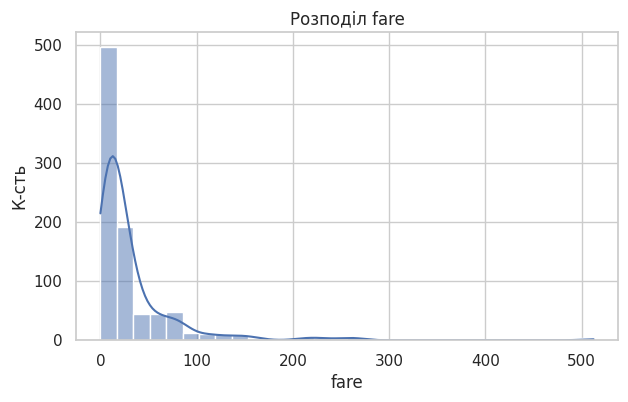

In [12]:
# 2) Розподіли ключових числових ознак (age, fare)
for col in ["age", "fare"]:
    plt.figure()
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Розподіл {col}")
    plt.xlabel(col); plt.ylabel("К-сть")
    plt.show()



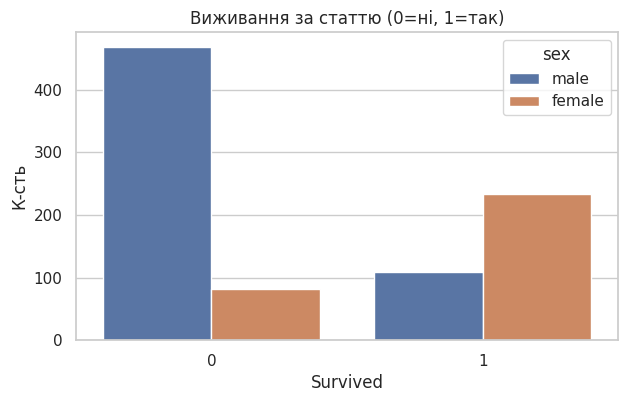

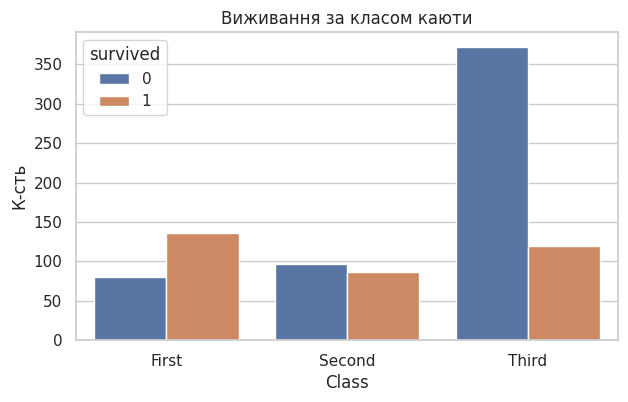

In [13]:
# 3) Категоріальні порівняння з hue
plt.figure()
sns.countplot(data=df, x="survived", hue="sex")
plt.title("Виживання за статтю (0=ні, 1=так)"); plt.xlabel("Survived"); plt.ylabel("К-сть")
plt.show()

plt.figure()
sns.countplot(data=df, x="class", hue="survived")
plt.title("Виживання за класом каюти"); plt.xlabel("Class"); plt.ylabel("К-сть")
plt.show()
# Висновок: жінки та пасажири вищих класів мали вищу ймовірність вижити.


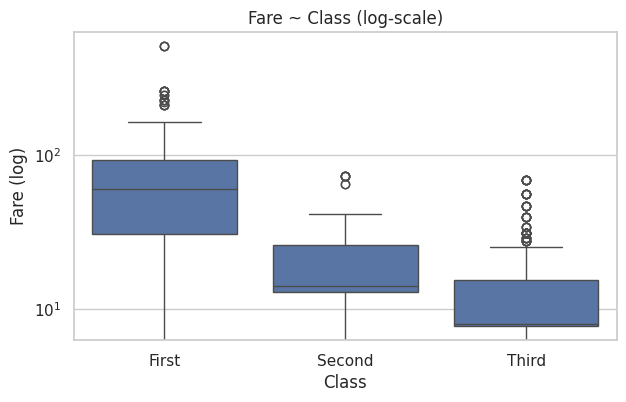

In [14]:
# 4) Boxplot/Violin: ціна квитка ~ клас
plt.figure()
sns.boxplot(data=df, x="class", y="fare")
plt.yscale("log")
plt.title("Fare ~ Class (log-scale)")
plt.xlabel("Class"); plt.ylabel("Fare (log)")
plt.show()



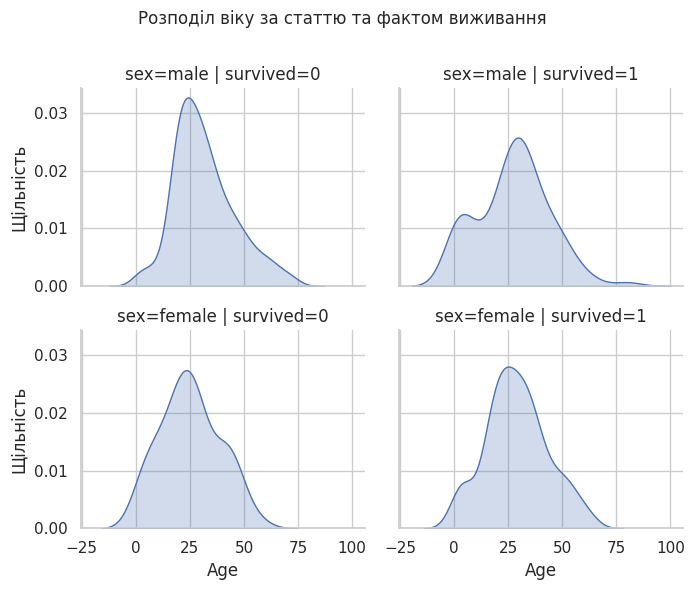

In [15]:
# 5) FacetGrid: як розподіляється вік за статтю × виживанням
grid_data = df.dropna(subset=["age", "sex", "survived"])
g = sns.FacetGrid(grid_data, row="sex", col="survived", height=3, aspect=1.2)
g.map(sns.kdeplot, "age", fill=True)
g.set_axis_labels("Age", "Щільність")
g.set_titles("sex={row_name} | survived={col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Розподіл віку за статтю та фактом виживання", fontsize=12)
plt.show()



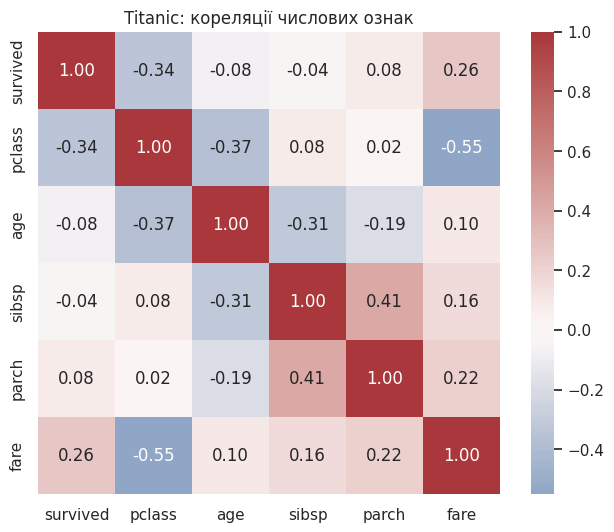

In [16]:
# 6) Кореляційна теплова карта тільки числових фіч
num = df.select_dtypes(include="number")
plt.figure(figsize=(8, 6))
sns.heatmap(num.corr(), annot=True, fmt=".2f", square=True, cmap="vlag", center=0)
plt.title("Titanic: кореляції числових ознак")
plt.show()

